# 資料分析

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# 943 個用戶對 1682 個項目的 100000 個評分
overall_stats = pd.read_csv('ml-100k/u.info', header=None)
print(list(overall_stats[0]))



# item id 重新命名為 movie_id
column_names1 = ['user_id','movie_id','rating','timestamp']
ratings_dataset = pd.read_csv('ml-100k/u.data', sep='\t',header=None,names=column_names1)
# print(ratings_dataset.head())

d = 'movie_id | movie_title | release_date | video_release_date | IMDb_URL | unknown | Action | Adventure | Animation | Children | Comedy | Crime | Documentary | Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western'
column_names2 = d.split(' | ')
items_dataset = pd.read_csv('ml-100k/u.item', sep='|',header=None,names=column_names2,encoding='latin-1')
# 因為 video release date 沒有值，因此將他移除
items_dataset = items_dataset.drop(columns=['video_release_date'])
# print(items_dataset.head())

d = 'user_id | age | gender | occupation | zip_code'
column_names3 = d.split(' | ')
users_dataset = pd.read_csv('ml-100k/u.user', sep='|',header=None,names=column_names3)

data = pd.merge(pd.merge(ratings_dataset, users_dataset), items_dataset)
data.head()

['943 users', '1682 items', '100000 ratings']


,user_id,movie_id,rating,timestamp,age,gender,occupation,zip_code,movie_title,release_date,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,881250949,49,M,writer,55105,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,886307828,23,M,programmer,94086,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,883268170,42,M,executive,98101,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,891033261,60,M,retired,94702,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,875747190,31,M,marketing,75240,Kolya (1996),24-Jan-1997,...,0,0,0,0,0,0,0,0,0,0


In [5]:
ratings_dataset.head() 

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
items_dataset.head() 

,movie_id,movie_title,release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
users_dataset.head() 

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


## 數據整理

In [8]:
ratings_dataset.isnull().sum().to_frame('No. of Nulls')

,No. of Nulls
user_id,0
movie_id,0
rating,0
timestamp,0


In [9]:
items_dataset.isnull().sum().to_frame('No. of Nulls')

,No. of Nulls
movie_id,0
movie_title,0
release_date,1
IMDb_URL,3
unknown,0
Action,0
Adventure,0
Animation,0
Children,0
Comedy,0


In [10]:
items_dataset[['movie_title']].duplicated().sum()

18

In [11]:
items_dataset[['movie_id']].duplicated().sum()

0

In [12]:
users_dataset.isnull().sum().to_frame('No. of Nulls')


,No. of Nulls
user_id,0
age,0
gender,0
occupation,0
zip_code,0


In [13]:
users_dataset[['user_id']].duplicated().sum()

0

In [14]:
movie_dataset = items_dataset[['movie_id','movie_title']]
movie_dataset.head()

,movie_id,movie_title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [15]:
ratings_merged_movie = pd.merge(ratings_dataset, movie_dataset, how='inner', on='movie_id')
print(len(ratings_merged_movie))
ratings_merged_movie.head()

100000


,user_id,movie_id,rating,timestamp,movie_title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


通過對唯一用戶 ID 和電影標題組合進行分組，從現有合併數據集創建數據集，並且用戶對不同實例（時間戳）中的同一部電影的評分被平均並存儲在新數據集中。

使用者對同電影評分多次的例子：

In [16]:
ratings_merged_movie[(ratings_merged_movie['movie_title'] == 'Chasing Amy (1997)') & (ratings_merged_movie['user_id'] == 894)]

,user_id,movie_id,rating,timestamp,movie_title
4800,894,246,4,882404137,Chasing Amy (1997)
22340,894,268,3,879896041,Chasing Amy (1997)


In [17]:
refined_dataset = ratings_merged_movie.groupby(by=['user_id','movie_title'], as_index=False).agg({"rating":"mean"})
print(len(refined_dataset))
refined_dataset.head()

99693


,user_id,movie_title,rating
0,1,101 Dalmatians (1996),2.0
1,1,12 Angry Men (1957),5.0
2,1,"20,000 Leagues Under the Sea (1954)",3.0
3,1,2001: A Space Odyssey (1968),4.0
4,1,"Abyss, The (1989)",3.0


原本多重評分問題被解決：

In [18]:
refined_dataset[(refined_dataset['movie_title'] == 'Chasing Amy (1997)') & (refined_dataset['user_id'] == 894)]

,user_id,movie_title,rating
94824,894,Chasing Amy (1997),3.5


In [19]:
# transfrom the users dataframe with numerical values (excluding zip_code)
users_num = users_dataset.copy()
users_num["gender"].replace(['M', 'F'],[0, 1], inplace=True) # replace M and F with 0 and 1, respectively
users_num["occupation"].replace(['writer', 'salesman', 'educator', 'homemaker', 'engineer', 'scientist', 'retired', 'student', 'librarian', 'artist', 'technician', 'other', 'lawyer', 'programmer', 'executive', 'administrator', 'marketing', 'none', 'healthcare', 'entertainment', 'doctor'],[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20], inplace=True)
users_num.head() 

,user_id,age,gender,occupation,zip_code
0,1,24,0,10,85711
1,2,53,1,11,94043
2,3,23,0,0,32067
3,4,24,0,10,43537
4,5,33,1,11,15213


## 相關性

<AxesSubplot: >

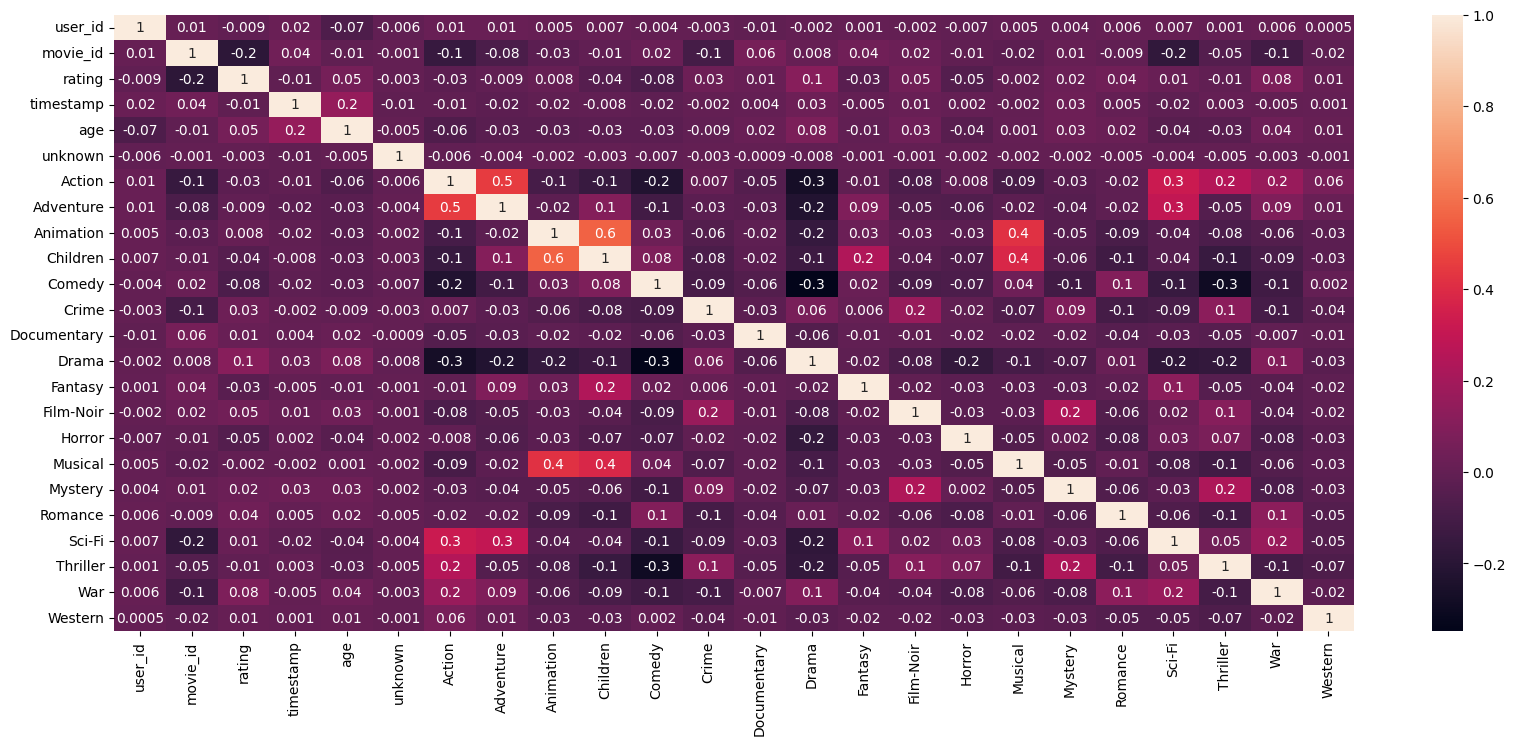

In [20]:
import seaborn as sns

plt.figure(figsize=(20, 8))
data = pd.merge(pd.merge(ratings_dataset, users_dataset), items_dataset)
sns.heatmap(data=data.corr(), annot=True, fmt='.1g')

## Rating 分佈

<AxesSubplot: xlabel='rating', ylabel='Density'>

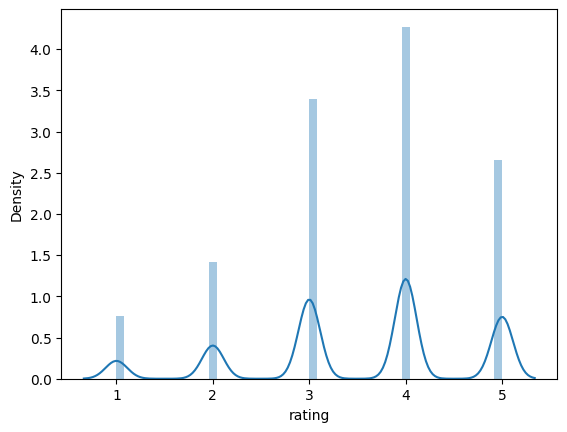

In [21]:
sns.distplot(ratings_dataset.rating)

可以發現大部分的評分皆落在 3、4 之間

## 每部電影的平均評分

In [22]:
# data aggregation
average_rating = refined_dataset[["movie_title", "rating"]].groupby("movie_title", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False)[:20]

,movie_title,rating
1359,Someone Else's America (1995),5.000000
944,Marlene Dietrich: Shadow and Light (1996),5.000000
1387,Star Kid (1997),5.000000
633,"Great Day in Harlem, A (1994)",5.000000
1472,They Made Me a Criminal (1939),5.000000
1277,Santa with Muscles (1996),5.000000
30,Aiqing wansui (1994),5.000000
1172,Prefontaine (1997),5.000000
462,Entertaining Angels: The Dorothy Day Story (1996),5.000000
1273,"Saint of Fort Washington, The (1993)",5.000000


## 各性別喜愛的電影排行

### 按性別計算每部電影的平均評分

In [ ]:
data = pd.merge(pd.merge(ratings_dataset, users_dataset), items_dataset)

mean_ratings = data.pivot_table('rating', index = ['movie_title'], columns = ['gender'], aggfunc='mean')
mean_ratings

gender,F,M
movie_title,,
'Til There Was You (1997),2.200000,2.500000
1-900 (1994),1.000000,3.000000
101 Dalmatians (1996),3.116279,2.772727
12 Angry Men (1957),4.269231,4.363636
187 (1997),3.500000,2.870968
...,...,...
Young Guns II (1990),2.500000,2.800000
"Young Poisoner's Handbook, The (1995)",3.777778,3.218750
Zeus and Roxanne (1997),2.000000,2.250000


### 性別分佈圖

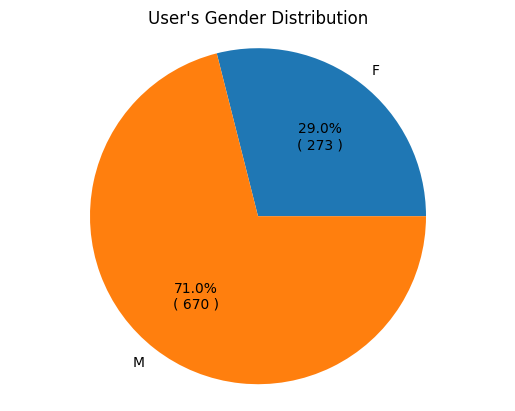

In [ ]:
# Gender distrubution
gender_count = users_dataset[["user_id", "gender"]].groupby("gender", as_index=False).size()  # count the numbers'

def func(s,d):
    t = int(round(s/100.*sum(d)))     # 透過百分比反推原本的數值
    return f'{s:.1f}%\n( {t} )'     # 使用文字格式化的方式，顯示內容

plt.pie(gender_count["size"], labels=gender_count["gender"], autopct=lambda i: func(i,gender_count["size"]))
plt.title("User's Gender Distribution")
plt.axis("equal")
plt.show()

### 女性觀眾評分最高的電影排行

In [ ]:
data = pd.merge(pd.merge(ratings_dataset, users_dataset), items_dataset)
mean_ratings = data.pivot_table('rating', index = ['movie_title'], columns = ['gender'], aggfunc='mean')
top_female_ratings = mean_ratings.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
movie_title,,
Prefontaine (1997),5.0,5.000000
Faster Pussycat! Kill! Kill! (1965),5.0,2.666667
Telling Lies in America (1997),5.0,3.083333
Maya Lin: A Strong Clear Vision (1994),5.0,4.333333
Stripes (1981),5.0,3.500000
Someone Else's America (1995),5.0,NaN
Foreign Correspondent (1940),5.0,3.785714
"Visitors, The (Visiteurs, Les) (1993)",5.0,2.000000
Year of the Horse (1997),5.0,3.000000


增加一欄存放男女平均評分之差，並對其排序，得到男女平均評分之差最大且女性觀眾很喜歡，但男性觀眾覺得還好的電影排行

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_female_by_diff = mean_ratings.sort_values(by='diff')
sorted_female_by_diff[:10]

gender,F,M,diff
movie_title,,,
Loch Ness (1995),4.0,1.000000,-3.000000
Love and Death on Long Island (1997),4.0,1.000000,-3.000000
"Visitors, The (Visiteurs, Les) (1993)",5.0,2.000000,-3.000000
"Lay of the Land, The (1997)",4.0,1.000000,-3.000000
Rough Magic (1995),4.0,1.000000,-3.000000
Faster Pussycat! Kill! Kill! (1965),5.0,2.666667,-2.333333
Chairman of the Board (1998),4.0,1.714286,-2.285714
Two Much (1996),4.0,1.800000,-2.200000
"Simple Wish, A (1997)",3.0,1.000000,-2.000000


### 男性觀眾評分最高的電影排行

In [ ]:
data = pd.merge(pd.merge(ratings_dataset, users_dataset), items_dataset)
mean_ratings = data.pivot_table('rating', index = ['movie_title'], columns = ['gender'], aggfunc='mean')
top_male_ratings = mean_ratings.sort_values(by='M', ascending=False)
top_male_ratings[:10]

gender,F,M
movie_title,,
"Great Day in Harlem, A (1994)",NaN,5.0
Santa with Muscles (1996),NaN,5.0
Prefontaine (1997),5.0,5.0
Aiqing wansui (1994),NaN,5.0
Entertaining Angels: The Dorothy Day Story (1996),NaN,5.0
"Quiet Room, The (1996)",3.0,5.0
"Leading Man, The (1996)",2.5,5.0
"Saint of Fort Washington, The (1993)",NaN,5.0
Star Kid (1997),NaN,5.0


對 mean_ratings['diff'] 排序結果反序可得男性觀眾很喜歡，但女性觀眾覺得還好的電影排行

In [ ]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_male_by_diff = mean_ratings.sort_values(by='diff', ascending=False)
sorted_male_by_diff[:10]

gender,F,M,diff
movie_title,,,
Delta of Venus (1994),1.0,5.000000,4.000000
Two or Three Things I Know About Her (1966),1.0,4.666667,3.666667
Paths of Glory (1957),1.0,4.419355,3.419355
"Magic Hour, The (1998)",1.0,4.250000,3.250000
So Dear to My Heart (1949),1.0,4.000000,3.000000
Spirits of the Dead (Tre passi nel delirio) (1968),1.0,4.000000,3.000000
Little City (1998),2.0,5.000000,3.000000
Aparajito (1956),1.0,4.000000,3.000000
Killer (Bulletproof Heart) (1994),1.0,4.000000,3.000000


## 觀察最多評分次數或評分最高的電影

In [ ]:
movie_ratings = pd.merge(items_dataset, ratings_dataset)
lens = pd.merge(movie_ratings, users_dataset)

### 評分次數最多的20部電影

In [ ]:
# 通過　groupby()　對　movie_title　進行分組
#　利用　size()　得到一個含有各電影分組大小的　Series　對象

most_rated = lens.groupby('movie_title').size().sort_values(ascending=False)[:20]
print(most_rated)

movie_title
Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
dtype: int64


### 評分最高的十部電影（限定評分次數至少超過100次的電影 ）

In [ ]:
import numpy as np
movie_stats = lens.groupby('movie_title').agg({'rating': [np.size, np.mean]})
atleast_100 = movie_stats['rating']['size'] >= 100
print(movie_stats[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:10])

                                 rating          
                                   size      mean
movie_title                                      
Close Shave, A (1995)               112  4.491071
Schindler's List (1993)             298  4.466443
Wrong Trousers, The (1993)          118  4.466102
Casablanca (1942)                   243  4.456790
Shawshank Redemption, The (1994)    283  4.445230
Rear Window (1954)                  209  4.387560
Usual Suspects, The (1995)          267  4.385768
Star Wars (1977)                    583  4.358491
12 Angry Men (1957)                 125  4.344000
Citizen Kane (1941)                 198  4.292929


## 各職業喜愛的電影排行

### 按職業計算每部電影的平均評分

In [ ]:
data = pd.merge(pd.merge(ratings_dataset, users_dataset), items_dataset)

mean_ratings = data.pivot_table('rating', index = ['movie_title'], columns = ['occupation'], aggfunc='mean')
mean_ratings

occupation,administrator,artist,doctor,educator,engineer,entertainment,executive,healthcare,homemaker,lawyer,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
movie_title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,2.00,2.0,4.0,2.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,2.333333,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,...,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.50
101 Dalmatians (1996),2.750000,2.75,NaN,2.9,3.000000,2.50,2.833333,2.333333,2.0,1.000000,...,2.666667,2.666667,3.333333,2.555556,NaN,4.0,2.0,3.160000,3.0,3.00
12 Angry Men (1957),4.555556,4.50,NaN,4.5,4.333333,3.75,4.000000,4.250000,NaN,4.666667,...,4.000000,5.000000,4.187500,4.416667,4.333333,NaN,5.0,4.210526,4.5,4.25
187 (1997),2.000000,4.00,NaN,3.0,2.000000,3.00,2.500000,2.000000,NaN,NaN,...,1.000000,4.500000,3.500000,3.000000,4.000000,NaN,3.0,3.181818,3.0,2.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Young Guns II (1990),2.000000,NaN,NaN,2.5,3.250000,NaN,1.000000,3.000000,NaN,2.000000,...,NaN,NaN,2.750000,2.500000,NaN,3.0,NaN,3.055556,2.8,NaN
"Young Poisoner's Handbook, The (1995)",3.666667,4.50,NaN,3.0,2.500000,4.00,2.000000,4.000000,NaN,NaN,...,NaN,NaN,5.000000,2.666667,NaN,NaN,2.0,4.000000,3.0,2.50
Zeus and Roxanne (1997),NaN,NaN,NaN,NaN,NaN,NaN,3.000000,1.000000,NaN,NaN,...,1.000000,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,NaN,3.00


### 職業分佈

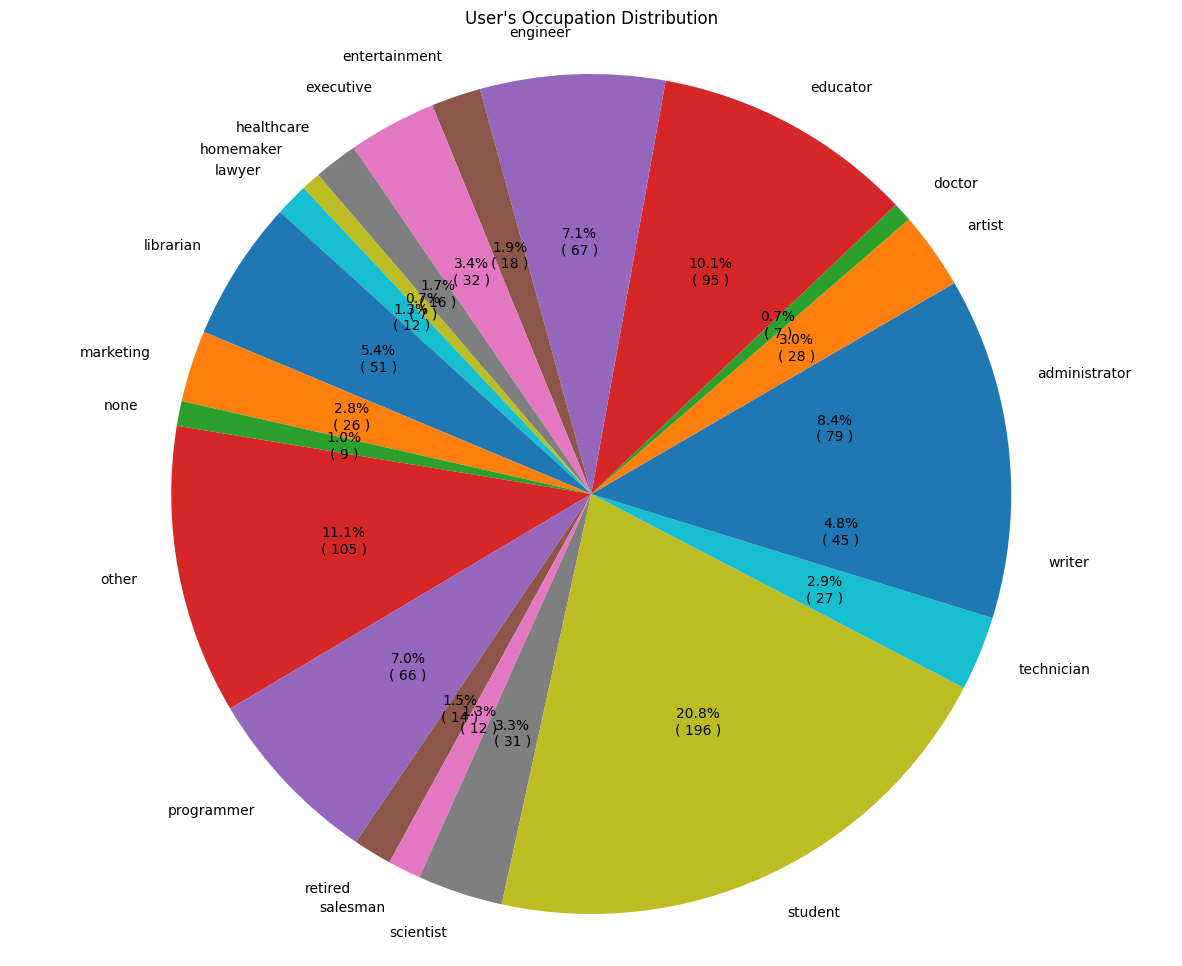

In [ ]:
# occupation distrubution
plt.rcParams['figure.figsize'] = [15, 12]
occupation_count = users_dataset[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"], autopct=lambda i: func(i,gender_count["size"]))
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

### 使用者人數排行前10的職業

In [ ]:
occupation_count_10 = occupation_count.sort_values(by='size', ascending=False, ignore_index = True)[:10]
occupation_count_10

,occupation,size
0,student,196
1,other,105
2,educator,95
3,administrator,79
4,engineer,67
5,programmer,66
6,librarian,51
7,writer,45
8,executive,32
9,scientist,31


### 使用者人數排行前5的職業最喜愛的十部電影（限定評分次數至少超過30次的電影 ）

#### 學生最喜愛的十部電影

In [ ]:
import numpy as np
student_stats = data[(data['occupation'] == 'student')].groupby('movie_title').agg({'rating': [np.size, np.mean]})
student_stats_30 = student_stats['rating']['size'] >= 30
student_stats[student_stats_30].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                         size      mean
movie_title                                            
Casablanca (1942)                          38  4.631579
Shawshank Redemption, The (1994)           61  4.590164
Titanic (1997)                             79  4.544304
Good Will Hunting (1997)                   35  4.542857
Usual Suspects, The (1995)                 63  4.492063
Godfather, The (1972)                      76  4.486842
Star Wars (1977)                          132  4.416667
One Flew Over the Cuckoo's Nest (1975)     43  4.395349
Rear Window (1954)                         31  4.387097
Empire Strikes Back, The (1980)            91  4.384615

#### 教師最喜愛的十部電影

In [ ]:
import numpy as np
educator_stats = data[(data['occupation'] == 'educator')].groupby('movie_title').agg({'rating': [np.size, np.mean]})
educator_stats_30 = educator_stats['rating']['size'] >= 30
educator_stats[educator_stats_30].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                   size      mean
movie_title                                      
Schindler's List (1993)              35  4.600000
Star Wars (1977)                     50  4.520000
Fargo (1996)                         54  4.314815
Sting, The (1973)                    30  4.300000
Godfather, The (1972)                43  4.279070
Raiders of the Lost Ark (1981)       33  4.242424
Pulp Fiction (1994)                  32  4.218750
L.A. Confidential (1997)             33  4.181818
Silence of the Lambs, The (1991)     30  4.166667
Postino, Il (1994)                   32  4.156250

#### 行政人員最喜愛的十部電影

In [ ]:
administrator_stats = data[(data['occupation'] == 'administrator')].groupby('movie_title').agg({'rating': [np.size, np.mean]})
administrator_stats_30 = administrator_stats['rating']['size'] >= 30
administrator_stats[administrator_stats_30].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                   size      mean
movie_title                                      
Fargo (1996)                         36  4.444444
Silence of the Lambs, The (1991)     34  4.441176
Star Wars (1977)                     44  4.363636
Godfather, The (1972)                32  4.343750
Contact (1997)                       38  4.289474
Pulp Fiction (1994)                  31  4.032258
Toy Story (1995)                     31  4.000000
Independence Day (ID4) (1996)        33  3.969697
English Patient, The (1996)          47  3.957447
Full Monty, The (1997)               32  3.937500

#### 工程師最喜愛的十部電影

In [ ]:
engineer_stats = data[(data['occupation'] == 'engineer')].groupby('movie_title').agg({'rating': [np.size, np.mean]})
engineer_stats_30 = engineer_stats['rating']['size'] >= 30
engineer_stats[engineer_stats_30].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                         size      mean
movie_title                                            
Raiders of the Lost Ark (1981)             44  4.590909
Star Wars (1977)                           50  4.480000
Empire Strikes Back, The (1980)            35  4.457143
Silence of the Lambs, The (1991)           38  4.421053
One Flew Over the Cuckoo's Nest (1975)     30  4.400000
Fargo (1996)                               45  4.288889
Monty Python and the Holy Grail (1974)     33  4.212121
Return of the Jedi (1983)                  44  4.181818
Pulp Fiction (1994)                        36  4.138889
Blade Runner (1982)                        30  4.100000

#### 程式設計師最喜愛的十部電影

In [ ]:
programmer_stats = data[(data['occupation'] == 'programmer')].groupby('movie_title').agg({'rating': [np.size, np.mean]})
programmer_stats_30 = programmer_stats['rating']['size'] >= 30
programmer_stats[programmer_stats_30].sort_values([('rating', 'mean')], ascending=False)[:10]

rating          
                                         size      mean
movie_title                                            
Star Wars (1977)                           50  4.540000
Empire Strikes Back, The (1980)            36  4.416667
Blade Runner (1982)                        32  4.375000
Silence of the Lambs, The (1991)           30  4.366667
Raiders of the Lost Ark (1981)             42  4.357143
Monty Python and the Holy Grail (1974)     33  4.303030
Fargo (1996)                               47  4.297872
Princess Bride, The (1987)                 30  4.200000
Godfather, The (1972)                      32  4.187500
Toy Story (1995)                           35  4.171429

# 推薦 

## 使用 MLP 進行預測

In [24]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

In [25]:
movies = pd.read_csv('ml-100k/u.item', sep = '|', header = None, engine = 'python', encoding = 'latin-1')
users = pd.read_csv('ml-100k/u.user', sep = '|', header = None, engine = 'python', encoding = 'latin-1')
ratings = pd.read_csv('ml-100k/u.data', sep = '\t', header = None, engine = 'python', encoding = 'latin-1')

In [26]:
training_set = pd.read_csv('ml-100k/ub.base', delimiter = '\t', header = None)
print(training_set.head(3))

   0  1  2          3
0  1  1  5  874965758
1  1  2  3  876893171
2  1  3  4  878542960


In [28]:
##convert it to array
training_set = np.array(training_set, dtype = 'int')
training_set.shape

(90570, 4)

In [29]:
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
test_set = pd.read_csv('ml-100k/ub.test', delimiter = '\t', names=rating_cols)
##convert it to array
nb_test=max(test_set["user_id"])
test_set = np.array(test_set, dtype = 'int')
test_set.shape

(9430, 4)

In [30]:
#take max users id in train and test data
nb_users = int(max(max(training_set[:,0]), max(test_set[:,0])))
nb_movies = int(max(max(training_set[:,1]), max(test_set[:,1])))

print('Num of users: ', nb_users, '\nNum of movies: ', nb_movies)

Num of users:  943 
Num of movies:  1682


In [31]:
def convert(data):
    new_data = []
    for id_users in range(1, nb_users + 1):
        ##id of movies that is rated by current users
        id_movies = data[:,1][data[:,0] == id_users]
        
        ##rate of movies that is given by current user
        id_ratings = data[:,2][data[:,0] == id_users]
        
        #inialize ratings for all movies
        #set 0 for movies that are not rated by current users
        ratings = np.zeros(nb_movies)
        #movie id starts from 1, 1st movie will be 1st element in rating with index as 0
        ratings[id_movies - 1] = id_ratings
        new_data.append(list(ratings))
    return new_data

In [32]:
training_set = convert(training_set)
test_set = convert(test_set)

In [33]:
training_set = torch.FloatTensor(training_set)
test_set = torch.FloatTensor(test_set)

In [34]:
training_set

tensor([[5., 3., 4.,  ..., 0., 0., 0.],
        [4., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 5., 0.,  ..., 0., 0., 0.]])

In [35]:
test_set

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [5., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [36]:
class SAE(nn.Module):
    def __init__(self, ):
        #allow to inhert all classes and methods of parent class
        super(SAE, self).__init__()
        #num of features from input: num of movies, 20 nodes in first hidden layer
        self.fc1 = nn.Linear(nb_movies, 20)
        self.fc2 = nn.Linear(20, 10)
        #start to decoding
        self.fc3 = nn.Linear(10, 20)
        self.fc4 = nn.Linear(20, nb_movies)
        self.activation = nn.Sigmoid()
        
    #input vector (movies rating) for a specific users
    def forward(self, x):
        #apply activaton fuc on first encoding layer
        #return first encoded vector
        x = self.activation(self.fc1(x))
        x = self.activation(self.fc2(x))
        x = self.activation(self.fc3(x))
        #no need to activate the vector
        #output the reconstrctured vector
        x = self.fc4(x)
        return x

In [37]:
sae = SAE()
#Create loss fucn object
criterion = nn.MSELoss()
#create optimizer object
#parameters of all auto-encoders defined in the class
optimizer = optim.RMSprop(sae.parameters(), lr = 0.01, weight_decay = 0.5)

In [39]:
# #train the SAE using pytorch only codes

#loop all epochs
nb_epoch = 300
for epoch in range(1, nb_epoch + 1):
    train_loss = 0
    #exclude users who did not rate any movies
    #define a float
    s = 0.
    #loop through each users
    for id_user in range(nb_users):
        #get all rating for current user from training_set
        #nn does not take single dimension vector, so add a batch dimension
        #a batch of sinlge inptu vector, update weigths after each vector
        input = Variable(training_set[id_user]).unsqueeze(0)
        #print(input.shape)
        #create target by copying input
        target = input.clone()
        #print(target.data > 0)
        #only look at users who rated at least 1 movie
        if torch.sum(target.data > 0) > 0:
            #get output from the network, a vector of predicted value
            output = sae(input)
            #do not compute gradient with respect to target
            target.require_grad = False
            #don't account the output whose initial input is 0
            output[target == 0] = 0
            loss = criterion(output, target)
            #make demonitor is not zero, to add a small number
            mean_corrector = nb_movies / float(torch.sum(target.data>0) + 1e-10)
            #backward method to determine which direction 
            loss.backward()
            #access the data of loss object .data[0]
            #adjust the loss to compute relevant mean for all movies for current user
            train_loss += np.sqrt(loss.data * mean_corrector)
            s += 1.
            #apply optimizer to update weights, decides the amount of weight udpates
            optimizer.step()
    if epoch % 10 == 0:
        print('epoch: '+str(epoch) + ' loss: ' + str(train_loss/s))

epoch: 10 loss: tensor(1.0178)
epoch: 20 loss: tensor(1.0149)
epoch: 30 loss: tensor(0.9974)
epoch: 40 loss: tensor(0.9875)
epoch: 50 loss: tensor(0.9799)
epoch: 60 loss: tensor(0.9685)
epoch: 70 loss: tensor(0.9629)
epoch: 80 loss: tensor(0.9558)
epoch: 90 loss: tensor(0.9505)
epoch: 100 loss: tensor(0.9476)
epoch: 110 loss: tensor(0.9439)
epoch: 120 loss: tensor(0.9408)
epoch: 130 loss: tensor(0.9376)
epoch: 140 loss: tensor(0.9340)
epoch: 150 loss: tensor(0.9321)
epoch: 160 loss: tensor(0.9290)
epoch: 170 loss: tensor(0.9262)
epoch: 180 loss: tensor(0.9238)
epoch: 190 loss: tensor(0.9216)
epoch: 200 loss: tensor(0.9189)
epoch: 210 loss: tensor(0.9162)
epoch: 220 loss: tensor(0.9127)
epoch: 230 loss: tensor(0.9103)
epoch: 240 loss: tensor(0.9074)
epoch: 250 loss: tensor(0.9102)
epoch: 260 loss: tensor(0.9065)
epoch: 270 loss: tensor(0.8991)
epoch: 280 loss: tensor(0.8943)
epoch: 290 loss: tensor(0.8907)
epoch: 300 loss: tensor(0.8874)


In [40]:
#loop through each users
test_loss = 0
s = 0.
for id_user in range(nb_users):
    #keep using training set
    input = Variable(training_set[id_user]).unsqueeze(0)
    #create target by copying input
    target = Variable(test_set[id_user]).unsqueeze(0)
    #only look at users who rated at least 1 movie
    if torch.sum(target.data > 0) > 0:
        #get output from the network, a vector of predicted value
        output = sae(input)
        #do not compute gradient with respect to target
        target.require_grad = False
        #don't account the output whose initial input is 0
        output[target == 0] = 0
        loss = criterion(output, target)
        #make demonitor is not zero, to add a small number
        mean_corrector = nb_movies/float(torch.sum(target.data > 0) + 1e-10)
        
        
        #access the data of loss object .data[0]
        #adjust the loss to compute relevant mean for all movies for current user
        test_loss += np.sqrt(loss.data*mean_corrector)
        s += 1.
print('test loss: '+str(test_loss/s))

test loss: tensor(0.9588)


In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,recall_score,precision_score

movie_title = movies.iloc[:nb_movies, 1:2]
p=[]
t=[]
for id_user in range(nb_users):
    user_rating = training_set.data.numpy()[id_user, :].reshape(-1,1)
    user_target = test_set.data.numpy()[id_user, :].reshape(-1,1)
    user_target[user_target>0]
    user_input = Variable(training_set[id_user]).unsqueeze(0)
    # print('training input: ', len(training_set[user_id]), training_set[user_id])
    predicted = sae(user_input)
    predicted = np.round(predicted.data.numpy().reshape(-1,1))
    #print('predicted: \n', len(predicted), predicted)
    user_input = user_input.data.numpy().reshape(-1,1)
    result_array = np.hstack([movie_title, user_input, user_target, predicted])
    result_df = pd.DataFrame(data=result_array, columns=['Movie', 'User input', 'Target Rating', 'Predicted'])
    result=result_df[result_df['Target Rating'] > 0]
    Target_Rating=result["Target Rating"]
    Predicted=result["Predicted"]
    p.append(Predicted.astype('int64'))
    t.append(Target_Rating.astype('int64'))
    tt=np.array(t)
    ppp=np.array(p)

print('mlp的MSE：',np.sqrt(mean_squared_error(t,p)))
print("mlp_accuracy:",accuracy_score(tt.reshape(-1,1),ppp.reshape(-1,1)))
print("mlp_based_recall:",recall_score(tt.reshape(-1,1), ppp.reshape(-1,1),average='macro'))
print("mlp_precision:",precision_score(tt.reshape(-1,1), ppp.reshape(-1,1),average='macro'))
    


mlp的MSE： 1.0366047032068195
mlp_accuracy: 0.39247083775185576
mlp_based_recall: 0.20838898799564035
mlp_precision: 0.2870927193521509


## 使用 SVD 矩陣分解進行推薦

In [ ]:
from surprise import accuracy, Dataset, SVD,Reader
from surprise.model_selection import train_test_split
import os

In [ ]:
# 指定文件路徑
file_path = os.path.expanduser('ml-100k/ub.base')
# 指定文件格式
reader = Reader(line_format='user item rating timestamp', sep='\t')
# 從文件讀取數據
train_data = Dataset.load_from_file(file_path, reader=reader)
trainset = train_data.build_full_trainset()

In [ ]:
algo = SVD()#矩陣分解
algo.fit(trainset)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,recall_score,precision_score
# 評分數據的文件路徑
ratings_path =  "ml-100k/ub.test"

# 評分數據表的名稱
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# 讀取數據表
ratings = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
#移除不要欄位
ratings.drop( "unix_timestamp", inplace = True, axis = 1 )

# 展示前5行数据
#ratings.head()

uid = ratings['user_id']
#展示各列的取值情况：取值的個數、數據類型
iid=ratings['movie_id']
tratings=ratings['rating']
prating=[]
for i in range(len(ratings)):
    pred = algo.predict(str(uid[i]),str(iid[i]),r_ui=4,verbose=False)
    pred = round(float(pred.est))
    prating.append(pred)
print('user_based的RMSE：',np.sqrt(mean_squared_error(tratings,prating)))
print("user_based_accuracy:",accuracy_score(tratings, prating))
print("user_based_recall:",recall_score(tratings, prating,average='macro'))
print("user_based_precision:",precision_score(tratings, prating,average='macro'))

user_based的RMSE： 1.0108111250054497
user_based_accuracy: 0.4031813361611877
user_based_recall: 0.29267522962696507
user_based_precision: 0.4797712938025116


## 根據訓練集的分布特徵隨機給出一個預測值


In [ ]:
from surprise import NormalPredictor
algo = NormalPredictor()
algo.fit(trainset)

In [ ]:
import numpy as np
import pandas as pd
# 评分数据的文件路径
ratings_path =  "ml-100k/ub.test"

# 评分数据表的列名
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# 读取数据表
ratings = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
#移除不要欄位
ratings.drop( "unix_timestamp", inplace = True, axis = 1 )

# 展示前5行数据
#ratings.head()

#print('评分数量：',len(ratings))
uid = ratings['user_id']
#展示各列的取值情况：取值的個數、數據類型
iid=ratings['movie_id']
tratings=ratings['rating']
prating=[]
for i in range(len(ratings)):
    pred = algo.predict(str(uid[i]),str(iid[i]),r_ui=4,verbose=False)
    pred = round(float(pred.est))
    prating.append(pred)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score,recall_score,precision_score
print('NormalPredictor的MSE：',np.sqrt(mean_squared_error(tratings,prating)))
print("NormalPredictor_accuracy:",accuracy_score(tratings, prating))
print("NormalPredictor_recall:",recall_score(tratings, prating,average='macro'))
print("NormalPredictor_precision:",precision_score(tratings, prating,average='macro'))

#print('user_based的acc：',accuracy_score(tratings,prating))

NormalPredictor的MSE： 1.549603992787988
NormalPredictor_accuracy: 0.2532343584305408
NormalPredictor_recall: 0.20454970688062168
NormalPredictor_precision: 0.20540628109947456


In [ ]:
#使用pandas進行數據展示和分析
import pandas as pd

#評分數據的文件路徑
ratings_path =  "ml-100k/u.data"

# 評分數據表的名稱
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# 讀取數據表
ratings = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
#移除不要欄位
ratings.drop( "unix_timestamp", inplace = True, axis = 1 )

# 展示前5行数据
ratings.head()

#print('评分数量：',len(ratings))

#展示各列的取值情况：取值的个数、数据类型

#ratings.nunique()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [ ]:
# 用戶屬性數據的文件路徑
user_path = "ml-100k/u.user"

# 用戶數據表的名稱
user_col = ['userid', 'age', 'gender', 'occupation', 'zip-code']

# 讀取數據表
users  = pd.read_csv(user_path, sep='|', names=user_col)
# 展示前5行數據
users.head()

#print('用户数量：',len(users ))

# 展示各列的取值情况：取值的个数、数据类型
#users .nunique()


,userid,age,gender,occupation,zip-code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [ ]:
# 電影屬性數據的文件路徑
movies_path = "ml-100k/u.item"

# 電影數據表的名稱
movies_col = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

# 讀取數據表

movies = pd.read_csv(movies_path,encoding='unicode_escape', sep='|', names=movies_col, usecols=range(5),dtype={'release_date': "S100", 'imdb_url': "S200"})

# 展示前5行数据
movies.head()


# 展示各列的取值情況：取值的個數、數據類型
#movies.nunique()

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),b'01-Jan-1995',NaN,b'http://us.imdb.com/M/title-exact?Toy%20Story...
1,2,GoldenEye (1995),b'01-Jan-1995',NaN,b'http://us.imdb.com/M/title-exact?GoldenEye%2...
2,3,Four Rooms (1995),b'01-Jan-1995',NaN,b'http://us.imdb.com/M/title-exact?Four%20Room...
3,4,Get Shorty (1995),b'01-Jan-1995',NaN,b'http://us.imdb.com/M/title-exact?Get%20Short...
4,5,Copycat (1995),b'01-Jan-1995',NaN,b'http://us.imdb.com/M/title-exact?Copycat%20(...


In [ ]:
def read_item_names():
    # 電影屬性數據的路徑
    movies_path = "ml-100k/u.item"

    # 電影ID為key的字典
    rid_to_name = {}

    # 电影名稱为key的字典
    name_to_rid = {}

    # ToDo
    # 電影數據表的名稱
    movies_col = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']

    # 讀取數據表
    movies = pd.read_csv(movies_path,encoding='unicode_escape', sep='|', names=movies_col, usecols=range(5),dtype={'release_date': "S100", 'imdb_url': "S200"})
    movieid=movies["movie_id"].values
    moviename=movies["title"].values

    for i in range(len(movies)):
        rid_to_name.update({str(movieid[i]):moviename[i]})
        name_to_rid.update({moviename[i]:movieid[i]})

    return rid_to_name, name_to_rid

rid_to_name, name_to_rid = read_item_names()
print(rid_to_name['520']) # Great Escape, The (1963)

print(name_to_rid['Toy Story (1995)']) # 36

Great Escape, The (1963)
1


In [ ]:
import os
from surprise import Reader, Dataset
# 指定文件路徑
file_path = os.path.expanduser('ml-100k/ub.base')
# 指定文件格式
reader = Reader(line_format='user item rating timestamp', sep='\t')
# 從文件讀取數據
data = Dataset.load_from_file(file_path, reader=reader)
trainset = data.build_full_trainset()

## 使用 Neighborhood-user_based-cosine

In [ ]:

from surprise import KNNBasic
import numpy as np
from sklearn.metrics import accuracy_score,recall_score,precision_score
# 使用cosine计算 item 相似度
sim_options = {'name': 'cosine', 'user_based': True}

# KNNBasic
algo = KNNBasic(sim_options=sim_options)
# 計算相似度矩陣
algo.fit(trainset)

# 查看相似度矩阵
algo.sim

# 評分數據的文件路徑
ratings_path =  "ml-100k/ub.test"

# 評分數據表的名稱
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# 讀取數據表
ratings = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
#移除不要欄位
ratings.drop( "unix_timestamp", inplace = True, axis = 1 )

# 展示前5行數據
#ratings.head()

#print('評分数量：',len(ratings))
uid = ratings['user_id']
#展示各列的取值情况：取值的個数、數據類型
iid=ratings['movie_id']
tratings=ratings['rating']
prating=[]
for i in range(len(ratings)):
    pred = algo.predict(str(uid[i]),str(iid[i]),r_ui=4,verbose=False)
    pred = round(float(pred.est))
    prating.append(pred)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
print('user_based的RMSE：',np.sqrt(mean_squared_error(tratings,prating)))

print("user_based_accuracy:",accuracy_score(tratings, prating))
print("user_based_recall:",recall_score(tratings, prating,average='macro'))
print("user_based_precision:",precision_score(tratings, prating,average='macro'))


Computing the cosine similarity matrix...
Done computing similarity matrix.
user_based的RMSE： 1.0793049882624601
user_based_accuracy: 0.368186638388123
user_based_recall: 0.2498251173072048
user_based_precision: 0.3365370832331404


## 使用 Neighborhood-item_based-cosine

In [ ]:

from surprise import KNNBasic
from sklearn.metrics import accuracy_score
# 使用cosine计算 item 相似度
sim_options = {'name': 'cosine', 'user_based': False}

#KNNBasic
algo = KNNBasic(sim_options=sim_options)
# 計算相似度矩陣
algo.fit(trainset)

# 查看相似度矩阵
algo.sim

# 評分數據的文件路徑
ratings_path =  "ml-100k/ub.test"

# 評分數據表的名稱
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# 讀取數據表
ratings = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
#移除不要欄位
ratings.drop( "unix_timestamp", inplace = True, axis = 1 )

# 展示前5行数据
#ratings.head()

#print('评分数量：',len(ratings))
uid = ratings['user_id']
#展示各列的取值情况：取值的个数、数据类型
iid=ratings['movie_id']
tratings=ratings['rating']
prating=[]
for i in range(len(ratings)):
    pred = algo.predict(str(uid[i]),str(iid[i]),r_ui=4,verbose=False)
    pred = round(float(pred.est))
    prating.append(pred)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
print('item_based的RMSE为：',np.sqrt(mean_squared_error(tratings,prating)))
print("user_based_accuracy:",accuracy_score(tratings, prating))
print("user_based_recall:",recall_score(tratings, prating,average='macro'))
print("user_based_precision:",precision_score(tratings, prating,average='macro'))

Computing the cosine similarity matrix...
Done computing similarity matrix.
item_based的RMSE为： 1.0854772542827498
user_based_accuracy: 0.37741251325556735
user_based_recall: 0.25430376932800847
user_based_precision: 0.4250719108985903


In [ ]:
# # 獲取電影名到電影id 和電影id到電影名的的映射
rid_to_name, name_to_rid = read_item_names()

# Retieve inner id of the movie Toy Story
toy_story_raw_id = name_to_rid['Toy Story (1995)']
#toy_story_inner_id = algo.trainset.to_inner_iid(toy_story_raw_id)

# Retrieve inner ids of the nearest neighbors of Toy Story.
toy_story_neighbors = algo.get_neighbors(toy_story_raw_id, k=10)

# Convert inner ids of the neighbors into names.
toy_story_neighbors = (algo.trainset.to_raw_iid(inner_id)for inner_id in toy_story_neighbors)
toy_story_neighbors = (rid_to_name[rid]for rid in toy_story_neighbors)

print()
print('The 10 nearest neighbors of Toy Story are:')
for movie in toy_story_neighbors:
    print(movie)


The 10 nearest neighbors of Toy Story are:
Promesse, La (1996)
3 Ninjas: High Noon At Mega Mountain (1998)
Wonderland (1997)
Incognito (1997)
FairyTale: A True Story (1997)
Ponette (1996)
Big Squeeze, The (1996)
The Innocent (1994)
Wishmaster (1997)
Bad Moon (1996)


## 使用 Random Forest

### 資料輸入

In [ ]:
# 使用 pandas 进行数据展示和分析
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# 评分数据的文件路径
ratings_path =  "ml-100k/u.data"

# 评分数据表的列名
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
# 读取数据表
id = pd.read_csv(ratings_path, sep='\t', names=rating_cols)
#移除不要欄位


id.drop( "unix_timestamp", inplace = True, axis = 1 )

# id["user_id"] = id["user_id"]/id["user_id"].abs().max()
# id["movie_id"] = id["movie_id"]/id["movie_id"].abs().max()
# id["rating"] = id["rating"]/id["rating"].abs().max()

#print(ratings)
# 展示前5行数据
id.head()

,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


### 資料整理

In [ ]:
# 用户属性数据的文件路径
user_path = "ml-100k/u.user"

# 用户数据表的列名
user_col = ['user_id', 'age', 'gender', 'occupation', 'zip-code']

users  = pd.read_csv(user_path, sep='|', names=user_col)
users.replace('M',0,inplace=True)
users.replace('F',1,inplace=True)
users.replace('writer',0,inplace=True)
users.replace('salesman',1,inplace=True)
users.replace('educator',2,inplace=True)
users.replace('homemaker',3,inplace=True)
users.replace('engineer',4,inplace=True)
users.replace('scientist',5,inplace=True)
users.replace('retired',6,inplace=True)
users.replace('student',7,inplace=True)
users.replace('librarian',8,inplace=True)
users.replace('artist',9,inplace=True)
users.replace('technician',10,inplace=True)
users.replace('other',11,inplace=True)
users.replace('lawyer',12,inplace=True)
users.replace('programmer',13,inplace=True)
users.replace('executive',14,inplace=True)
users.replace('administrator',15,inplace=True)
users.replace('marketing',16,inplace=True)
users.replace('none',17,inplace=True)
users.replace('healthcare',18,inplace=True)
users.replace('entertainment',19,inplace=True)
users.replace('doctor',20,inplace=True)
users.drop( "zip-code", inplace = True, axis = 1 )
users.head()

,user_id,age,gender,occupation
0,1,24,0,10
1,2,53,1,11
2,3,23,0,0
3,4,24,0,10
4,5,33,1,11


In [ ]:
# 电影属性数据的文件路径
movies_path = "ml-100k/u.item"

# 电影数据表的列名
movies_col = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url',"unknown ","Action" ," Adventure" ,"Animation" ," Children's","Comedy"," Crime ","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]

# 读取数据表

movies = pd.read_csv(movies_path,encoding='unicode_escape', sep='|', names=movies_col, usecols=range(24),dtype={'release_date': "S100", 'imdb_url': "S200"})
movies.drop( "title", inplace = True, axis = 1 )
movies.drop( "video_release_date", inplace = True, axis = 1 )
movies.drop( "release_date", inplace = True, axis = 1 )
movies.drop( "imdb_url", inplace = True, axis = 1 )

# 读取数据表
# 展示前5行数据
movies.head()

#print('电影数量：',len(movies))

# 展示各列的取值情况：取值的个数、数据类型
#movies.nunique()


,movie_id,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [ ]:
result = pd.merge(id,users)
result = pd.merge(result,movies)
result.head(20)

,user_id,movie_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,196,242,3,49,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,305,242,5,23,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,242,4,42,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,234,242,4,60,0,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,63,242,3,31,0,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,181,242,1,26,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,201,242,4,27,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,249,242,5,25,0,7,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,13,242,2,47,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,279,242,3,33,0,13,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.utils import shuffle
result=shuffle(result)
result

,user_id,movie_id,rating,age,gender,occupation,unknown,Action,Adventure,Animation,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
74464,452,45,4,35,0,15,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
82503,256,123,2,35,1,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
41816,918,631,4,40,0,5,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
18428,660,159,1,26,0,7,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
5212,6,13,2,42,0,14,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20959,638,511,3,45,0,4,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
14192,421,79,4,38,1,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
53724,175,193,4,26,1,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98569,677,908,4,20,0,11,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 特徵 = all

In [ ]:
from keras import backend as K #转换为张量

#result.drop( "user_id", inplace = True, axis = 1 )
ratings=id["rating"]
# result.drop( "rating", inplace = True, axis = 1 )
# result.drop( "movie_id", inplace = True, axis = 1 )
#result.drop( "age", inplace = True, axis = 1 )
#result.drop( "gender", inplace = True, axis = 1 )
feature_cols = feature_cols = [	"age","gender","occupation","unknown ","Action" ," Adventure" ,"Animation" ," Children's","Comedy"," Crime ","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"]#["user_id",	"movie_id","age","gender","occupation"]#[	"movie_id","occupation"]
x3=result.loc[:,feature_cols]
y3=ratings
result.head()

x3 = K.cast_to_floatx(x3)
y3 = K.cast_to_floatx(y3)

### 特徵 = 4

In [ ]:
from keras import backend as K #转换为张量

# result.drop( "user_id", inplace = True, axis = 1 )
ratings=id["rating"]
# result.drop( "rating", inplace = True, axis = 1 )
# result.drop( "movie_id", inplace = True, axis = 1 )
# result.drop( "age", inplace = True, axis = 1 )
# result.drop( "gender", inplace = True, axis = 1 )
feature_cols = feature_cols = ["movie_id","age","gender","occupation"]#[	"user_id",	"age","gender","occupation"]#[	"movie_id","occupation"]
x2=result.loc[:,feature_cols]
y2=ratings
result.head()

x2 = K.cast_to_floatx(x2)
y2 = K.cast_to_floatx(y2)

### 特徵 = 3

In [ ]:
from keras import backend as K #转换为张量

# result.drop( "user_id", inplace = True, axis = 1 )
ratings=id["rating"]
# result.drop( "rating", inplace = True, axis = 1 )
# result.drop( "movie_id", inplace = True, axis = 1 )
# result.drop( "age", inplace = True, axis = 1 )
# result.drop( "gender", inplace = True, axis = 1 )
feature_cols = feature_cols = ["age","gender","occupation"]#[	"movie_id","user_id",	"age","gender","occupation"]#[	"movie_id","occupation"]
x=result.loc[:,feature_cols]
y=ratings
# result.head()

x = K.cast_to_floatx(x)
y = K.cast_to_floatx(y)

### 分割

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
X2_train,X2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=0.3)
X3_train,X3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.3)
print(y)

[3. 3. 1. ... 1. 2. 3.]


### 模型 F = 3 使用效果

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel = RandomForestClassifier(n_estimators=200, criterion = 'entropy')
# 使用訓練資料訓練模型
randomForestModel.fit(X_train, y_train)
# 使用訓練資料預測分類
predicted = randomForestModel.predict(X_test)

# 預測成功的比例
print('訓練集: ',randomForestModel.score(X_train,y_train))
print('測試集: ',randomForestModel.score(X_test,y_test))

訓練集:  0.34762857142857145
測試集:  0.3327333333333333


### 模型 F = 4 使用效果

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel2 = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
# 使用訓練資料訓練模型
randomForestModel2.fit(X2_train, y2_train)
# 使用訓練資料預測分類
predicted2 = randomForestModel2.predict(X2_test)

# 預測成功的比例
print('訓練集: ',randomForestModel2.score(X2_train,y2_train))
print('測試集: ',randomForestModel2.score(X2_test,y2_test))

訓練集:  0.9056
測試集:  0.25426666666666664


### 模型 F = all 使用效果

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 建立 Random Forest Classifier 模型
randomForestModel3 = RandomForestClassifier(n_estimators=100, criterion = 'entropy')
# 使用訓練資料訓練模型
randomForestModel3.fit(X3_train, y3_train)
# 使用訓練資料預測分類
predicted3 = randomForestModel3.predict(X3_test)

# 預測成功的比例
print('訓練集: ',randomForestModel3.score(X3_train,y3_train))
print('測試集: ',randomForestModel3.score(X3_test,y3_test))

訓練集:  0.5889142857142857
測試集:  0.28186666666666665


### Accuracy、Precision、Recall、F1

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
ac=accuracy_score(y_test,predicted)
ac2=accuracy_score(y2_test,predicted2)
ac3=accuracy_score(y3_test,predicted3)

print('F = 3 的 Accuracy: ',ac)
print('F = 4 的 Accuracy: ',ac2)
print('F = all 的 Accuracy: ',ac3)

F = 3 的 Accuracy:  0.3327333333333333
F = 4 的 Accuracy:  0.25426666666666664
F = all 的 Accuracy:  0.28186666666666665


In [ ]:
p=precision_score(y_test,predicted,average='macro')
p2=precision_score(y2_test,predicted2,average='macro')
p3=precision_score(y3_test,predicted3,average='macro')

print('F = 3 的 Precision: ',p)
print('F = 4 的 Precision: ',p2)
print('F = all 的 Precision: ',p3)

F = 3 的 Precision:  0.1670251475850113
F = 4 的 Precision:  0.1997006359324655
F = all 的 Precision:  0.20034574288562484


In [ ]:
r=recall_score(y_test,predicted,average='macro')
r2=recall_score(y2_test,predicted2,average='macro')
r3=recall_score(y3_test,predicted3,average='macro')

print('F = 3 的 Recall: ',r)
print('F = 4 的 Recall: ',r2)
print('F = all 的 Recall: ',r3)

F = 3 的 Recall:  0.19985266558458537
F = 4 的 Recall:  0.19963756600340155
F = all 的 Recall:  0.19967429469784972


In [ ]:
f=f1_score(y_test,predicted,average='macro')
f2=f1_score(y2_test,predicted2,average='macro')
f3=f1_score(y3_test,predicted3,average='macro')

print('F = 3 的 F1: ',f)
print('F = 4 的 F1: ',f2)
print('F = all 的 F1: ',f3)

F = 3 的 F1:  0.13606561721155203
F = 4 的 F1:  0.1996108724692805
F = all 的 F1:  0.1934496980979194
